- https://youtu.be/Q_MbN-vu_2w?si=TrCYKV6q64rN6-Fq
- https://youtu.be/qBs29egdVNU?si=9X_UuFSqqsLBNndo
- https://youtu.be/cZ5w3b9ES7Q?si=NaiWh-SkPjqmKlmS

# [자전거 공유 수요](https://www.kaggle.com/competitions/bike-sharing-demand/overview)
워싱턴D.C 소재의 자전거 대여 스타트업의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표!!

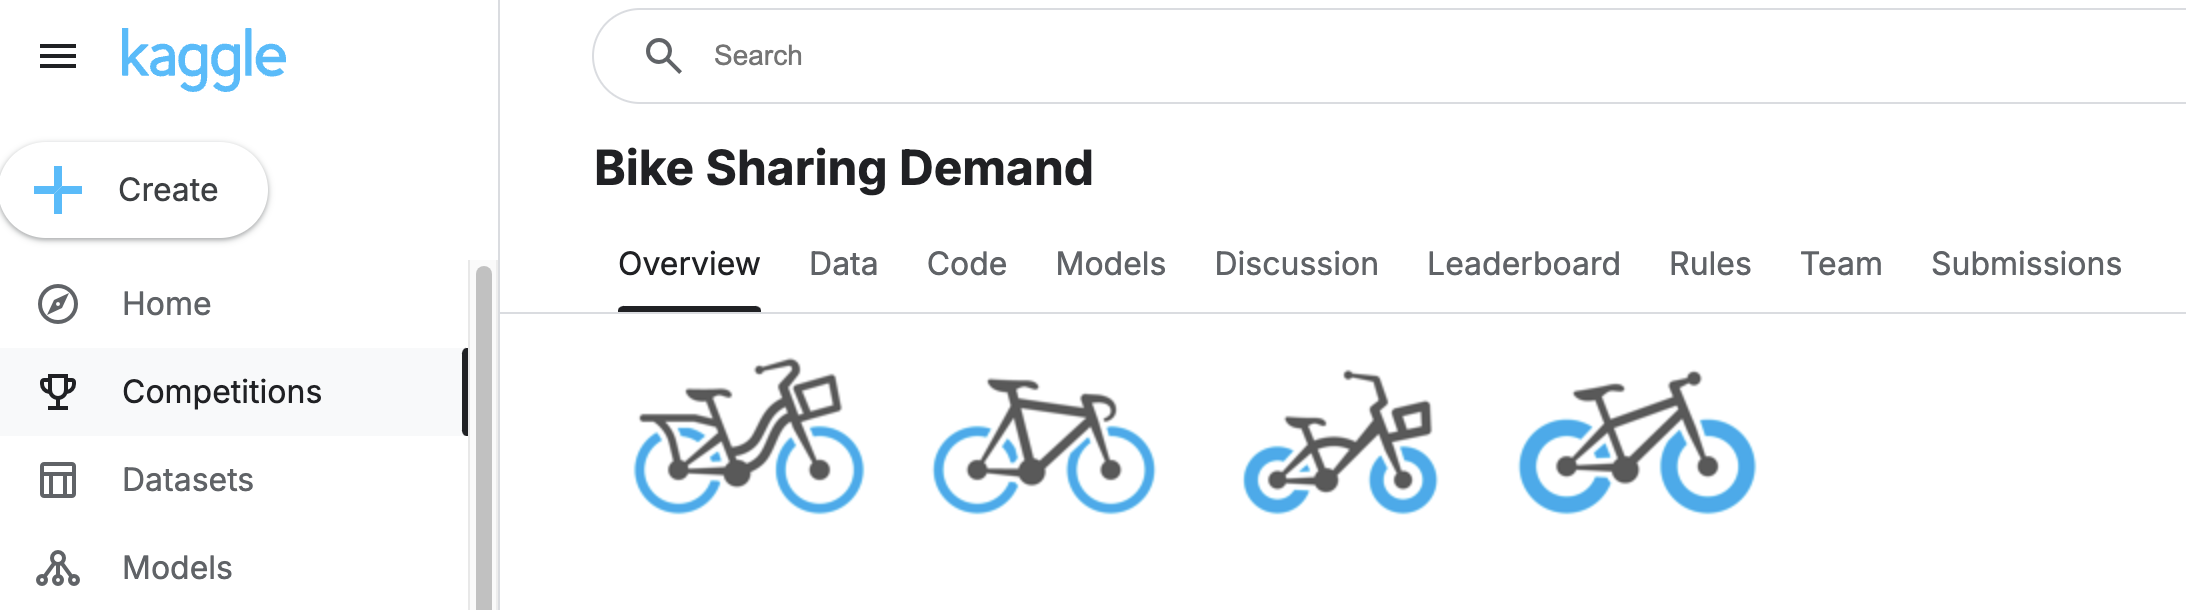

## 평가지표 - RMSLE
- Root Mean Squared Logarithmic Error
- 잔차(residual)에 대한 평균에 로그를 씌운 값
- 과대평가 된 항목보다 과소 평가 된 항목에 패널티를 주기위해
- 정답에 대한 오류를 숫자로 나타낸 값이 클 수록 오차가 크다는 의미이다.
  - 즉, 값이 작을 수록 오류가 적다는 의미를 나타낸다.

$$ RMSLE= \sqrt{\frac{1}{n}\sum_{i=1}^{n}(log(y_{i}+1)-log(y\hat{}_{i}+1))^2}$$

## [Data 설명](https://www.kaggle.com/competitions/bike-sharing-demand/data?select=sampleSubmission.csv)

### Features

- datetime:  
  - hourly date + timestamp  
- season(계절):  
  - 1 = spring
  - 2 = summer
  - 3 = fall
  - 4 = winter
- holiday(휴일):  
  - whether the day is considered a holiday
- workingday(근무일):
  - whether the day is neither a weekend nor holiday
- weather(날씨):
  - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp(온도):
  - temperature in Celsius
- atemp(체감온도):
  - "feels like" temperature in Celsius
- humidity(습도):
  - relative humidity
- windspeed(풍속):
  - wind speed

### Target

- count:
  - 총 대여 수
  - number of total rentals

참고용
- casual:
  - 미등록 사용자 대여 개시 수
  - number of non-registered user rentals initiated
- registered:
  - 등록 사용자 대여 개시
  -  number of registered user rentals initiated

# Import Library

In [1]:
import os
import datetime

# 데이터 분석
import numpy as np
import pandas as pd
from scipy import stats

# 데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

plt.ion()
# 그래프에서 격자로 숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용
plt.style.use('ggplot')



# 데이터 분리
from sklearn.model_selection import train_test_split


# warning
import warnings
warnings.filterwarnings('ignore')

## Connect to google account

In [3]:
from google.colab import drive
drive.mount('/content/data')

Drive already mounted at /content/data; to attempt to forcibly remount, call drive.mount("/content/data", force_remount=True).


# Global Variables

In [ ]:
import easydict
import json
args = easydict.EasyDict()

# path
args.default_path = '/content/data/MyDrive/AI_study/1. Machine Learning/Projects/kaggle/bike_sharing_demand/kaggle_exam'
args.train_path = args.default_path+'train.csv'
args.test_path = args.default_path+'test.csv'
args.submission_path = args.default_path+'sampleSubmission.csv'

args.SEED = 42

# Load Data

## train data

In [ ]:
train = pd.read_csv(args.train_path)

print(train.shape)
train.head(3)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [ ]:
train.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


## test data

In [ ]:
test = pd.read_csv(args.test_path)

print(test.shape)
test.head(3)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [ ]:
test.tail(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981
6492,2012-12-31 23:00:00,1,0,1,1,10.66,13.635,65,8.9981


## submission data

In [ ]:
submission = pd.read_csv(args.submission_path)

print(submission.shape)
submission.head(3)

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0


# 데이터 타입

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


## 날짜 데이터 타입으로 변경

In [ ]:
train['datetime'] = pd.to_datetime(train['datetime'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


## datetime 변수 생성

In [ ]:
print(f'before: {train.shape}')

for data in [train]:
  data['year'] = data['datetime'].dt.year # 년도
  data['month'] = data['datetime'].dt.month # 월
  data['day'] = data['datetime'].dt.day # 일
  data['dayofweek'] = data['datetime'].dt.dayofweek # 요일
  data['quarter'] = data['datetime'].dt.quarter # 분기
  data['hour'] = data['datetime'].dt.hour # 시간
  data['minute'] = data['datetime'].dt.minute # 분
  data['second'] = data['datetime'].dt.second # 초

  data['weekend'] = data['dayofweek'].apply(lambda x: int(x in [5,6]))

train.drop(['datetime'], axis=1, inplace=True)
print(f'after: {train.shape}')

before: (10886, 12)
after: (10886, 20)


# Target

In [ ]:
df_target = train[['count', 'casual', 'registered']].copy()
df_target.shape

(10886, 3)

In [ ]:
df_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   count       10886 non-null  int64
 1   casual      10886 non-null  int64
 2   registered  10886 non-null  int64
dtypes: int64(3)
memory usage: 255.3 KB


In [ ]:
df_target.describe()

,count,casual,registered
count,10886.000000,10886.000000,10886.000000
mean,191.574132,36.021955,155.552177
std,181.144454,49.960477,151.039033
min,1.000000,0.000000,0.000000
25%,42.000000,4.000000,36.000000
50%,145.000000,17.000000,118.000000
75%,284.000000,49.000000,222.000000
max,977.000000,367.000000,886.000000


In [ ]:
df_target['count'].sum() == df_target['casual'].sum() + df_target['registered'].sum()

True

In [ ]:
round((df_target['casual'].sum() / df_target['count'].sum()), 2)

0.19

In [ ]:
round((df_target['registered'].sum() / df_target['count'].sum()), 2)

0.81

## count

<Axes: xlabel='count'>

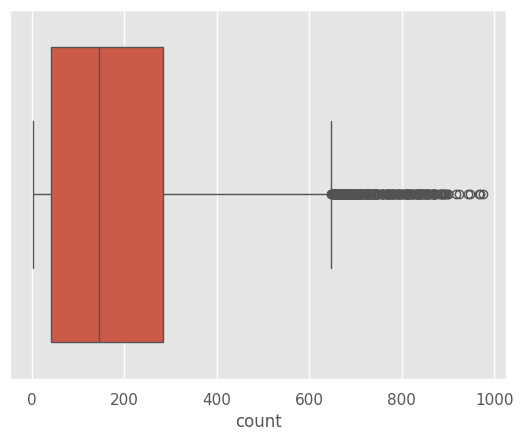

In [ ]:
sns.boxplot(data=train, x='count', orient='v')

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.87626461, 6.87832647,
         6.88550967])),
 (1.3647396459244172, 4.591363690454027, 0.9611793780126952))

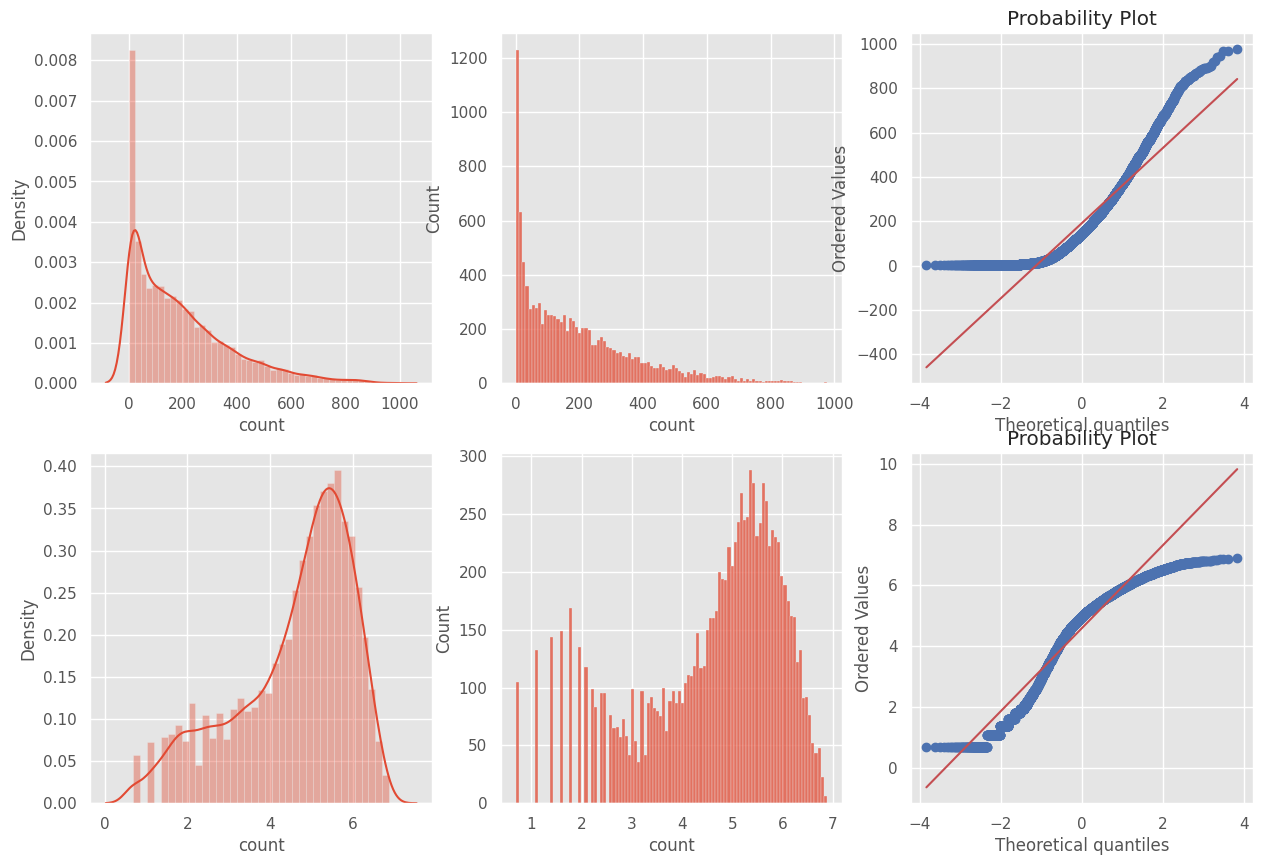

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(15, 10)

sns.distplot(train['count'], ax=ax1)
sns.histplot(train['count'], bins=100, ax=ax2)
stats.probplot(train["count"], dist='norm', fit=True, plot=ax3)
sns.distplot(np.log1p(train['count']), ax=ax4)
sns.histplot(np.log1p(train['count']), bins=100, ax=ax5)
stats.probplot(np.log1p(train['count']), dist='norm', fit=True, plot=ax6)

In [ ]:
dailyDataWithoutOutliers = train[np.abs(train["count"]-train["count"].mean())<=(3*train["count"].std())]

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909617))

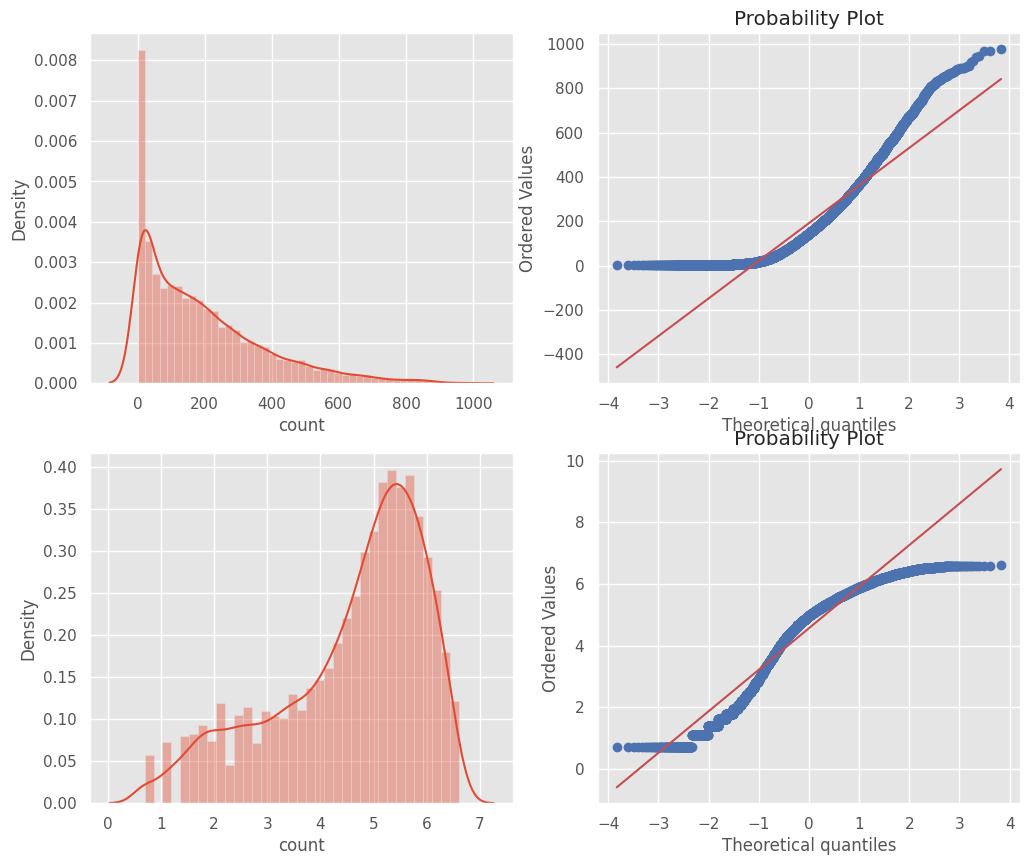

In [ ]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(train["count"],ax=axes[0][0])
stats.probplot(train["count"], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log1p(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

## casual

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.        , 0.        , 0.        , ..., 5.89164421, 5.89440283,
         5.90808294])),
 (1.4665476515913094, 2.7124391746089027, 0.9832830543491913))

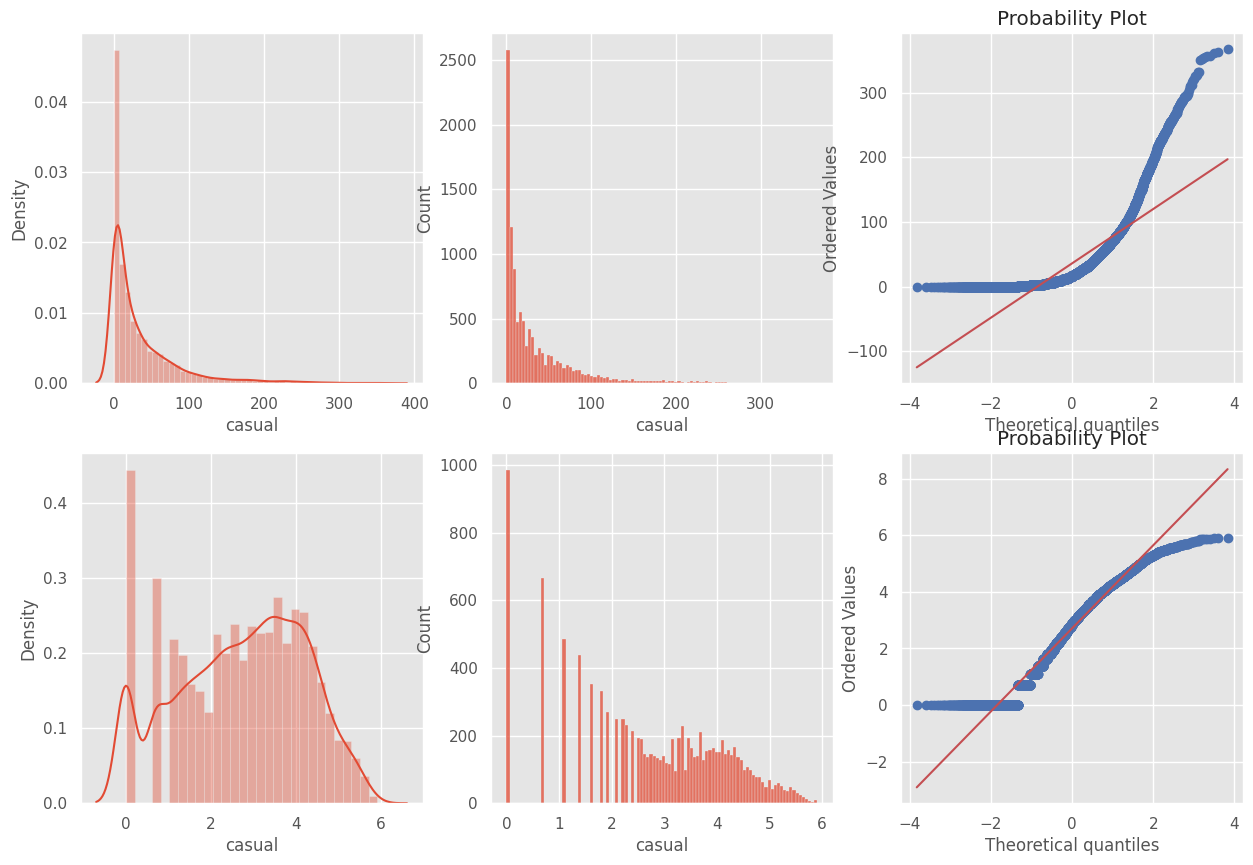

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(15, 10)

sns.distplot(train['casual'], ax=ax1)
sns.histplot(train['casual'], bins=100, ax=ax2)
stats.probplot(train["casual"], dist='norm', fit=True, plot=ax3)
sns.distplot(np.log1p(train['casual']), ax=ax4)
sns.histplot(np.log1p(train['casual']), bins=100, ax=ax5)
stats.probplot(np.log1p(train['casual']), dist='norm', fit=True, plot=ax6)

## registered

((array([-3.83154229, -3.60754977, -3.48462983, ...,  3.48462983,
          3.60754977,  3.83154229]),
  array([0.        , 0.        , 0.        , ..., 6.7546041 , 6.7546041 ,
         6.78784498])),
 (1.346719883159061, 4.395774259845611, 0.9620920520999376))

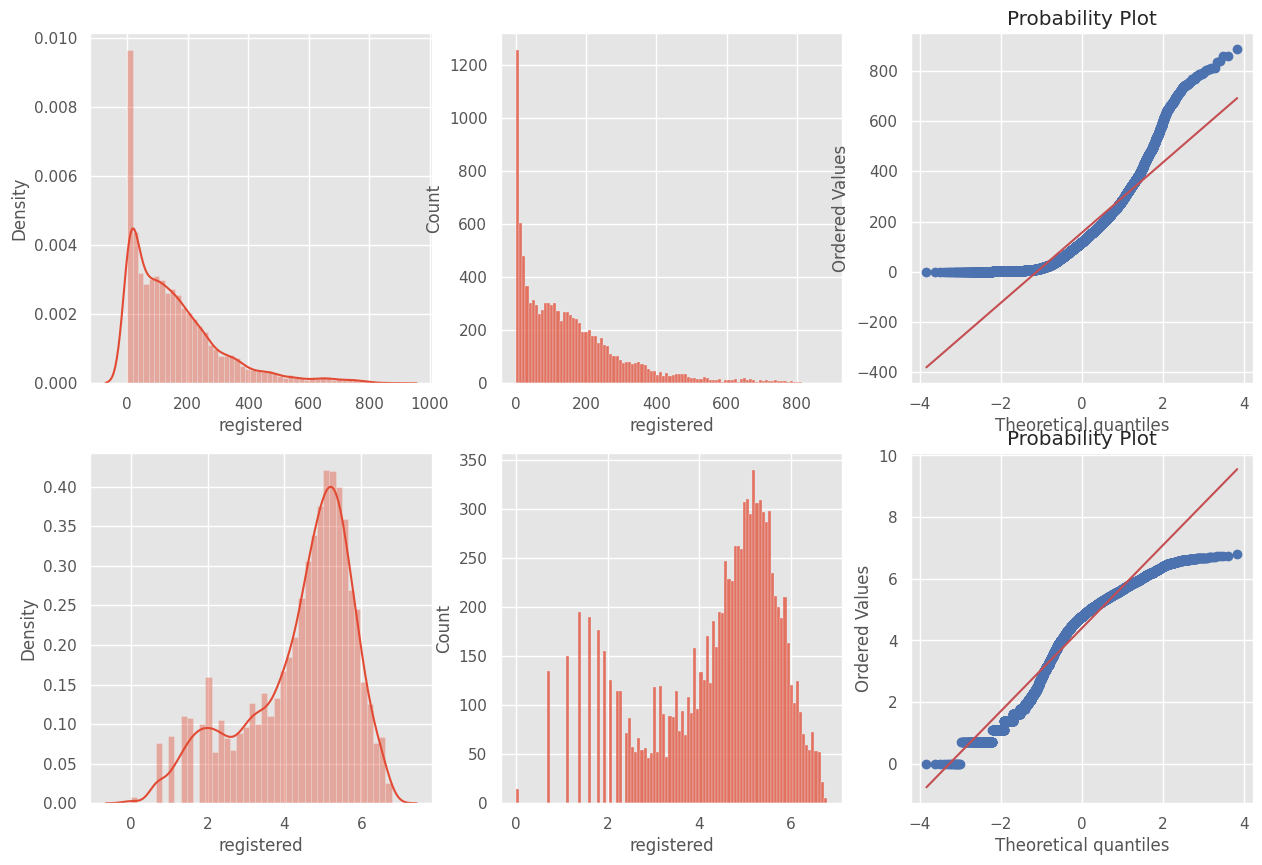

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(ncols=3,nrows=2)
fig.set_size_inches(15, 10)

sns.distplot(train['registered'], ax=ax1)
sns.histplot(train['registered'], bins=100, ax=ax2)
stats.probplot(train["registered"], dist='norm', fit=True, plot=ax3)
sns.distplot(np.log1p(train['registered']), ax=ax4)
sns.histplot(np.log1p(train['registered']), bins=100, ax=ax5)
stats.probplot(np.log1p(train['registered']), dist='norm', fit=True, plot=ax6)

## convert count with log

In [ ]:
train['count_log'] = train['count'].map(lambda x: np.log1p(x))
train['new_count'] = train['count_log'].map(lambda x: np.exp(x)-1)
train[['count_log', 'count', 'new_count']]

,count_log,count,new_count
0,2.833213,16,16.0
1,3.713572,40,40.0
2,3.496508,32,32.0
3,2.639057,13,13.0
4,0.693147,1,1.0
...,...,...,...
10881,5.820083,336,336.0
10882,5.488938,241,241.0
10883,5.129899,168,168.0
10884,4.867534,129,129.0


In [ ]:
train[['count_log', 'count', 'new_count']].describe()

,count_log,count,new_count
count,10886.000000,10886.000000,10886.000000
mean,4.591364,191.574132,191.574132
std,1.419454,181.144454,181.144454
min,0.693147,1.000000,1.000000
25%,3.761200,42.000000,42.000000
50%,4.983607,145.000000,145.000000
75%,5.652489,284.000000,284.000000
max,6.885510,977.000000,977.000000


## 해석
- count
  - 왼쪽으로 치우처져있는 비대칭 그래프
  - outlier를 제거한 그래프와 log를 적용한 그래프를 보면 모양이 같은 것을 알 수 있다.
    - 즉, log만 적용하면 충분할 듯
- registered
  - count와 데이터 분포(그래프 모양)이 비슷함
- casual
  - count와 데이터 분포(그래프 모양)이 매우 다름
- registered : casual 비율
  - 81:19

# 결측치

In [ ]:
(train.isnull().sum() / train.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

,0
season,0.0
holiday,0.0
count_log,0.0
weekend,0.0
second,0.0
minute,0.0
hour,0.0
quarter,0.0
dayofweek,0.0
day,0.0


In [ ]:
(test.isnull().sum() / test.shape[0]).round(4).sort_values(ascending=False) # 각 걸럼별 결측치 비율

,0
datetime,0.0
season,0.0
holiday,0.0
workingday,0.0
weather,0.0
temp,0.0
atemp,0.0
humidity,0.0
windspeed,0.0


## 0 값 확인

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,day,dayofweek,quarter,hour,minute,second,weekend,count_log,new_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,6.521495,9.992559,3.013963,2.506614,11.541613,0.0,0.0,0.290557,4.591364,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,3.444373,5.476608,2.004585,1.116174,6.915838,0.0,0.0,0.454040,1.419454,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.693147,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,4.000000,5.000000,1.000000,2.000000,6.000000,0.0,0.0,0.000000,3.761200,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,7.000000,10.000000,3.000000,3.000000,12.000000,0.0,0.0,0.000000,4.983607,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,10.000000,15.000000,5.000000,4.000000,18.000000,0.0,0.0,1.000000,5.652489,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,12.000000,19.000000,6.000000,4.000000,23.000000,0.0,0.0,1.000000,6.885510,977.000000


<Axes: xlabel='humidity', ylabel='count'>

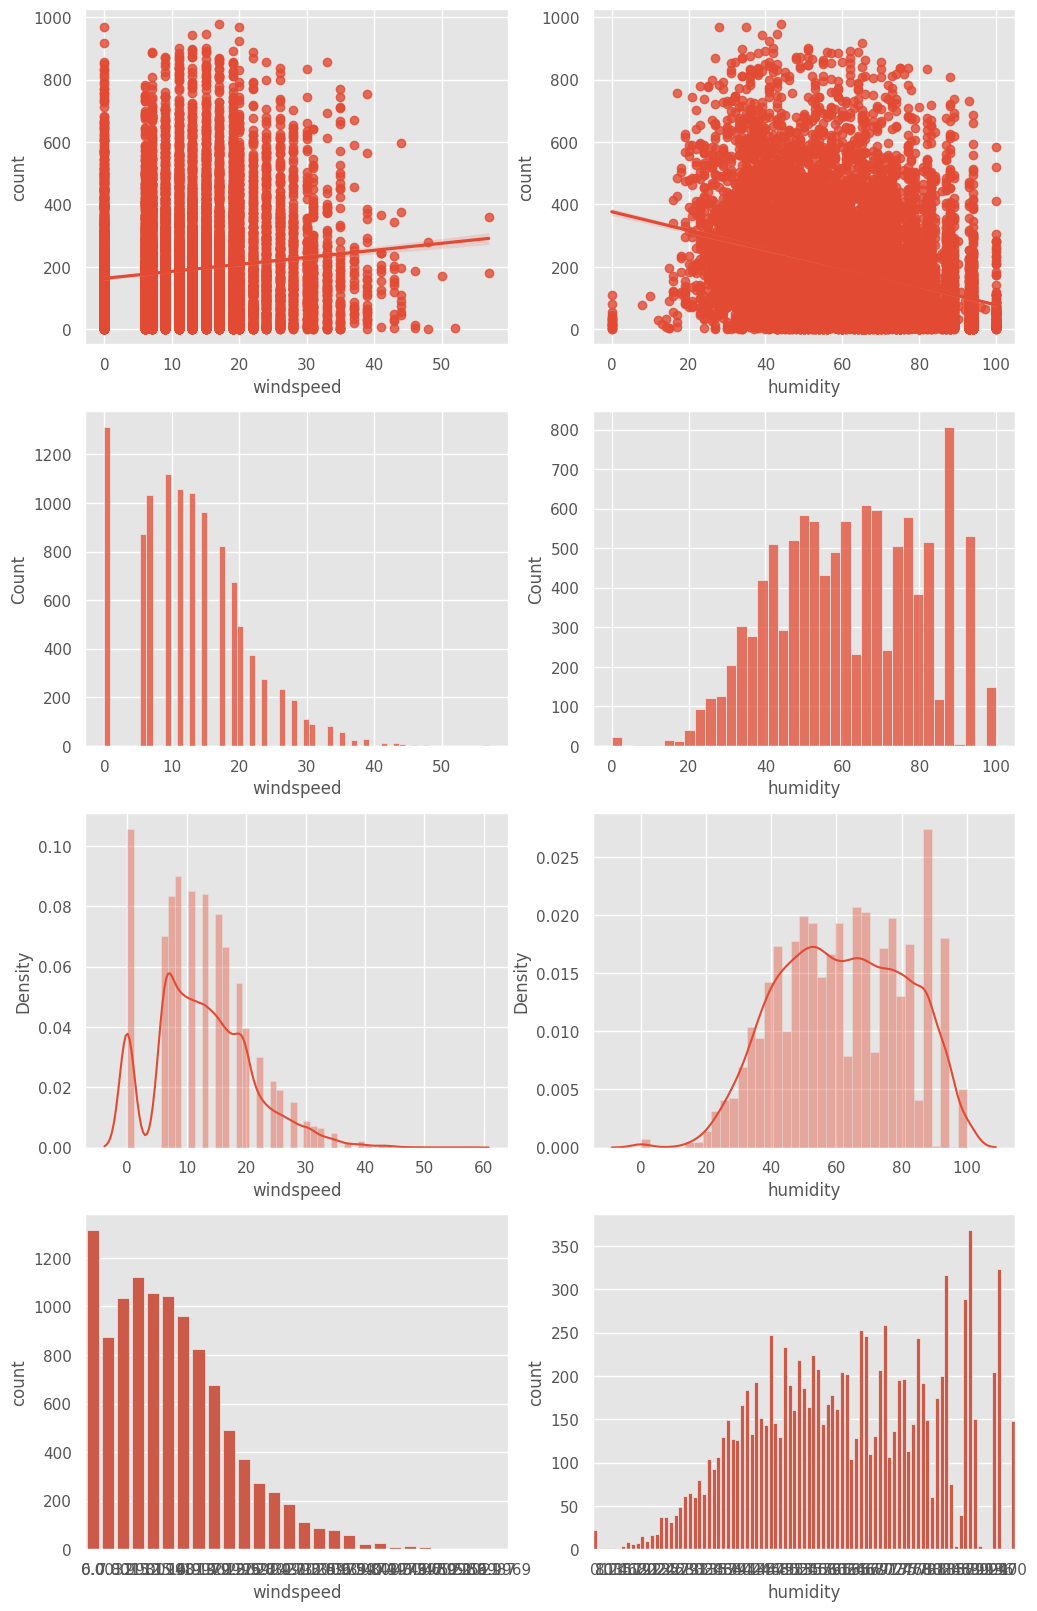

In [ ]:
fig,((ax1,ax2), (ax3,ax4), (ax5,ax6), (ax7,ax8)) = plt.subplots(ncols=2, nrows=4)
fig.set_size_inches(12, 20)

sns.regplot(x="windspeed", y="count", data=train,ax=ax1)
sns.regplot(x="humidity", y="count", data=train,ax=ax2)

sns.histplot(data=train, x='windspeed', ax=ax3)
sns.histplot(data=train, x='humidity', ax=ax4)

sns.distplot(train['windspeed'], ax=ax5)
sns.distplot(train['humidity'], ax=ax6)

sns.countplot(data=train, x='windspeed', ax=ax7)
sns.countplot(data=train, x='humidity', ax=ax8)


## 해석
- 결측치 없음
- windspeed의 0값이 너무 많음
- humidity의 0값은 별로 없음

# 통계 분석(Statistical analysis)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int32  
 12  month       10886 non-null  int32  
 13  day         10886 non-null  int32  
 14  dayofweek   10886 non-null  int32  
 15  quarter     10886 non-null  int32  
 16  hour        10886 non-null  int32  
 17  minute      10886 non-null  int32  
 18  second      10886 non-null  int32  
 19  weekend     10886 non-nul

In [ ]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,...,month,day,dayofweek,quarter,hour,minute,second,weekend,count_log,new_count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,...,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.0,10886.0,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,...,6.521495,9.992559,3.013963,2.506614,11.541613,0.0,0.0,0.290557,4.591364,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,...,3.444373,5.476608,2.004585,1.116174,6.915838,0.0,0.0,0.454040,1.419454,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.693147,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,...,4.000000,5.000000,1.000000,2.000000,6.000000,0.0,0.0,0.000000,3.761200,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,...,7.000000,10.000000,3.000000,3.000000,12.000000,0.0,0.0,0.000000,4.983607,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,...,10.000000,15.000000,5.000000,4.000000,18.000000,0.0,0.0,1.000000,5.652489,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,...,12.000000,19.000000,6.000000,4.000000,23.000000,0.0,0.0,1.000000,6.885510,977.000000


In [ ]:
train.columns

Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count', 'year',
       'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'second',
       'weekend', 'count_log', 'new_count'],
      dtype='object')

In [ ]:
num_cols = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
cat_cols = ['season', 'holiday', 'workingday', 'weather', 'year', 'month', 'day', 'dayofweek', 'quarter', 'hour', 'minute', 'second', 'weekend']


In [ ]:
df_num = train[num_cols].copy()
df_num.describe()

,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df_cat = train[cat_cols].copy()

for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

df_cat.describe()

,season,holiday,workingday,weather,year,month,day,dayofweek,quarter,hour,minute,second,weekend
count,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886,10886
unique,4,2,2,4,2,12,19,7,4,24,1,1,2
top,4,0,1,1,2012,5,1,5,4,12,0,0,0
freq,2734,10575,7412,7192,5464,912,575,1584,2734,456,10886,10886,7723


# 데이터 분포 분석(Distribution)

## 날짜
- 년도가 증가할 수록 데이터가 증가
- 사용 패턴은 비슷함

<Axes: xlabel='hour', ylabel='count'>

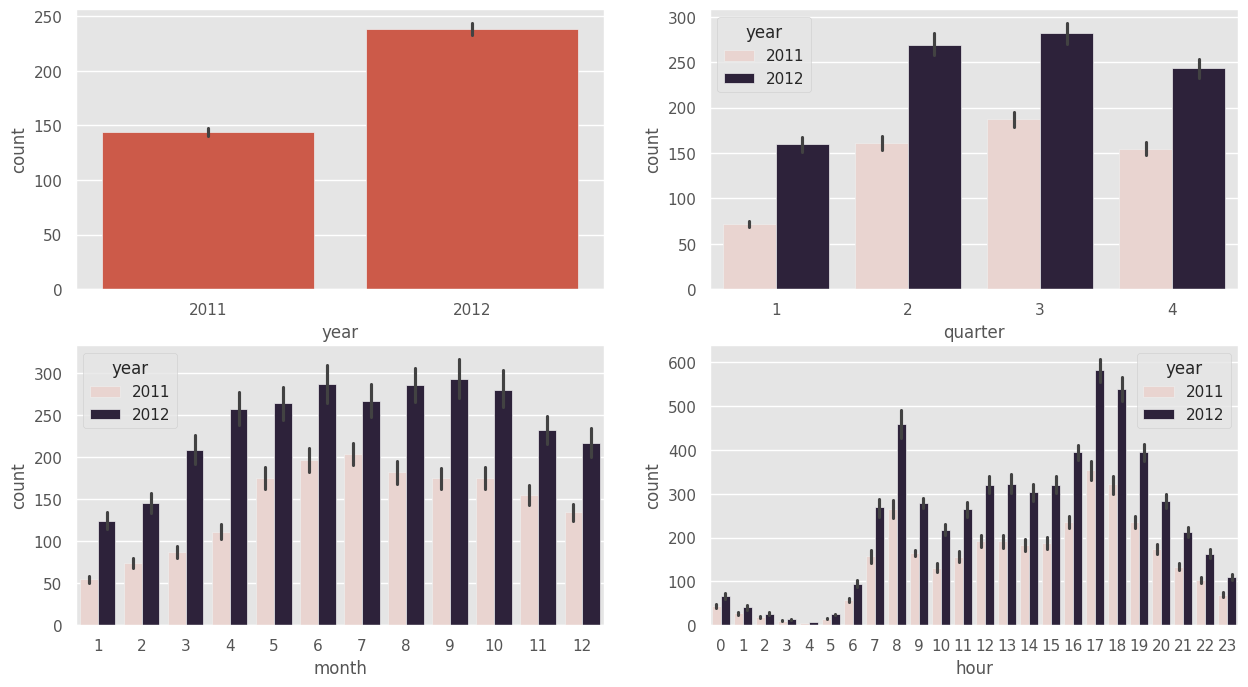

In [ ]:
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(15,8)

sns.barplot(data=train, x='year', y='count', ax=ax1) # 연도별 대여량
sns.barplot(data=train, x='quarter', y='count', hue='year', ax=ax2) # 분기별 대여량
sns.barplot(data=train, x='month', y='count', hue='year', ax=ax3) # 월별 대여량
sns.barplot(data=train, x='hour', y='count', hue='year', ax=ax4) # 시간별 대여량

- 날짜 데이터들의 양은 쏠림없이 되어 있음

<Axes: xlabel='second', ylabel='count'>

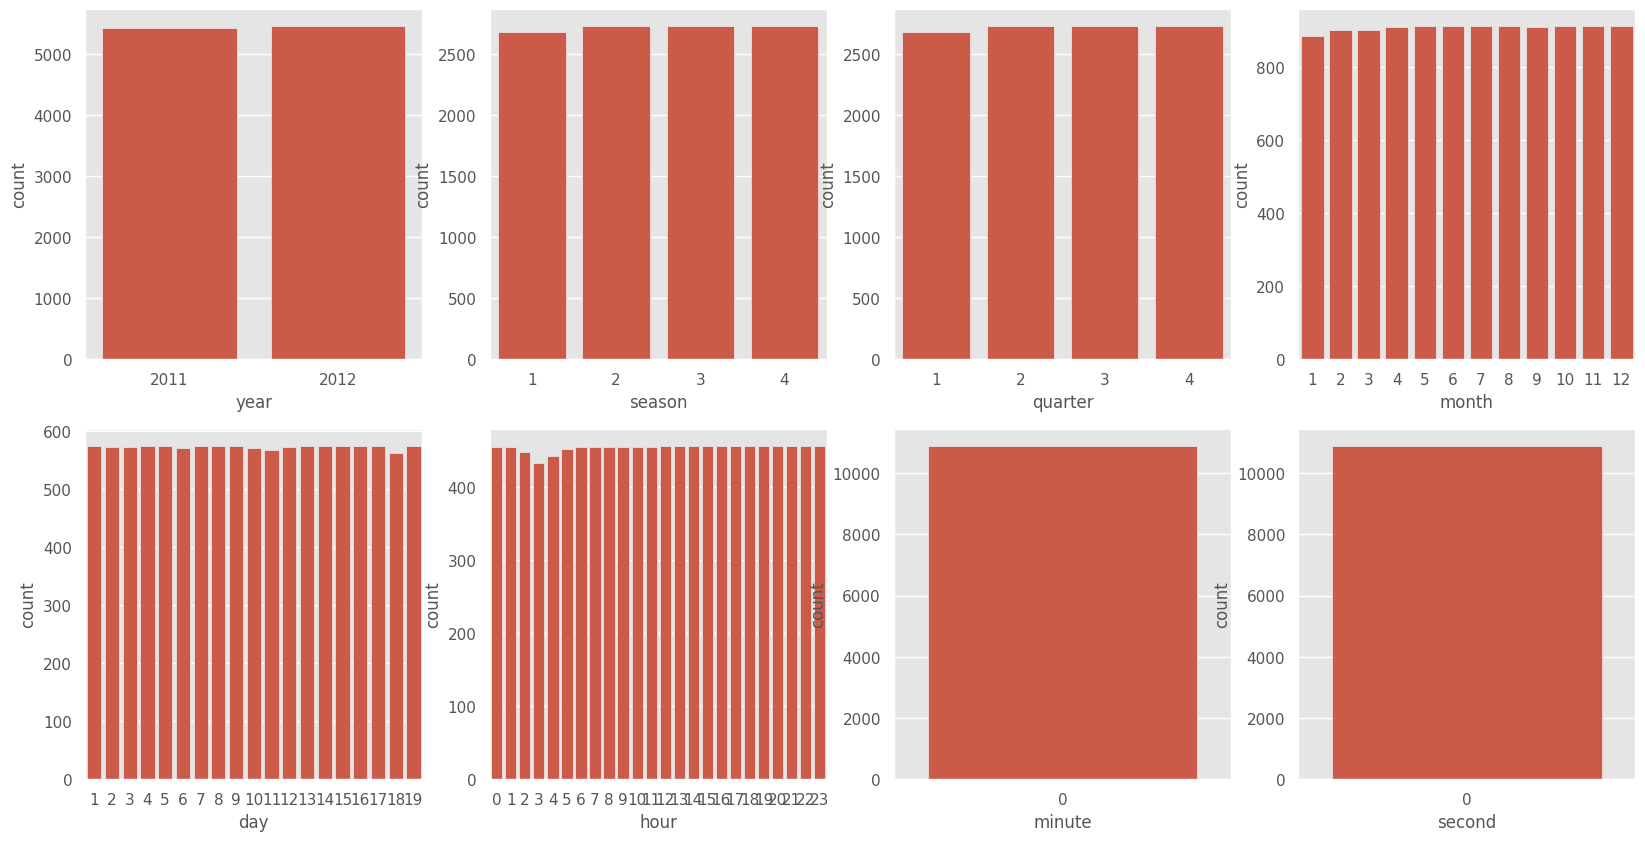

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20,10)

sns.countplot(data=train, x='year', orient='v', ax=ax1)
sns.countplot(data=train, x='season', orient='v', ax=ax2)
sns.countplot(data=train, x='quarter', orient='v', ax=ax3)
sns.countplot(data=train, x='month', orient='v', ax=ax4)
sns.countplot(data=train, x='day', orient='v', ax=ax5)
sns.countplot(data=train, x='hour', orient='v', ax=ax6)
sns.countplot(data=train, x='minute', orient='v', ax=ax7)
sns.countplot(data=train, x='second', orient='v', ax=ax8)

- 시간대별로 사용량이 다름
- 여름, 가을이 봄, 겨울보다 사용량이 많음

<Axes: xlabel='second', ylabel='count'>

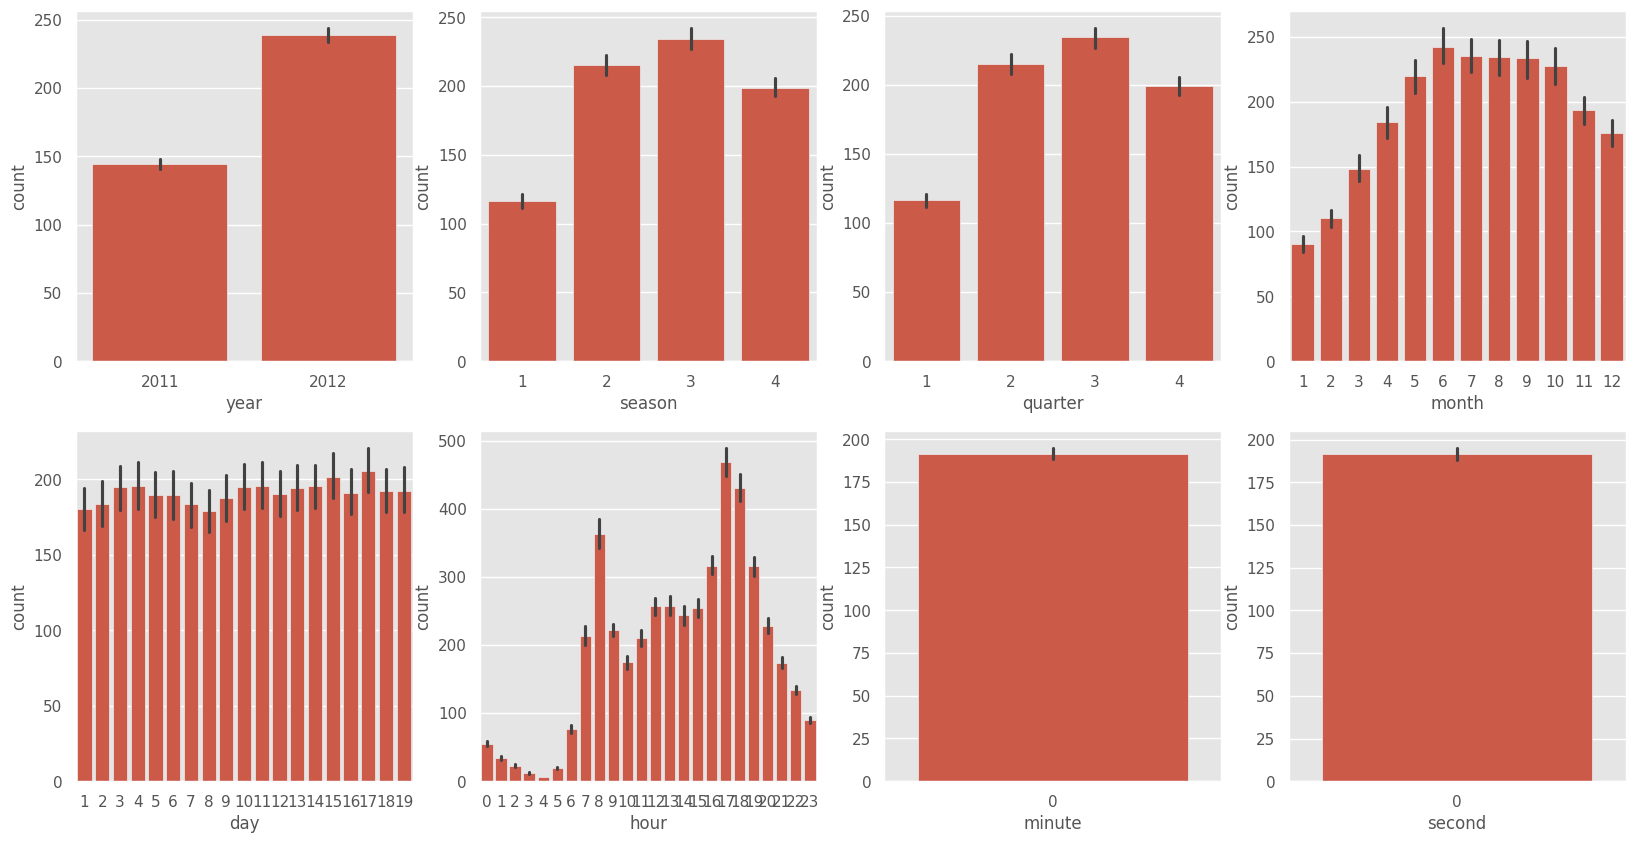

In [ ]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
fig.set_size_inches(20,10)

sns.barplot(data=train, y='count', x='year', orient='v', ax=ax1)
sns.barplot(data=train, y='count', x='season', orient='v', ax=ax2)
sns.barplot(data=train, y='count', x='quarter', orient='v', ax=ax3)
sns.barplot(data=train, y='count', x='month', orient='v', ax=ax4)
sns.barplot(data=train, y='count', x='day', orient='v', ax=ax5)
sns.barplot(data=train, y='count', x='hour', orient='v', ax=ax6)
sns.barplot(data=train, y='count', x='minute', orient='v', ax=ax7)
sns.barplot(data=train, y='count', x='second', orient='v', ax=ax8)

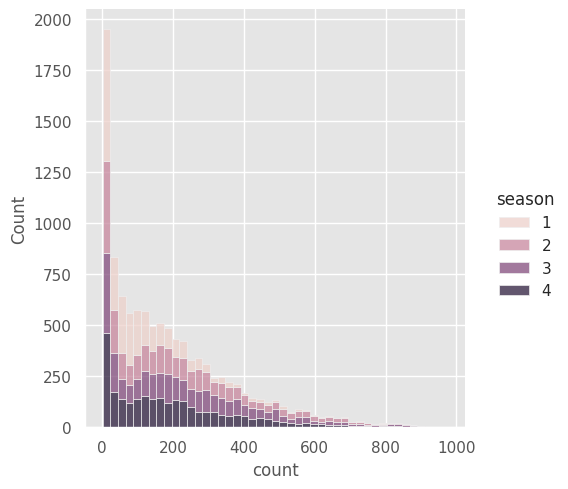

In [ ]:
sns.displot(train, x="count", hue="season", multiple="stack")

## 날씨

- weather데이터에서 4의 데이터는 거의 없음
- windspeed의 0값이 많음

<Axes: xlabel='weather', ylabel='count'>

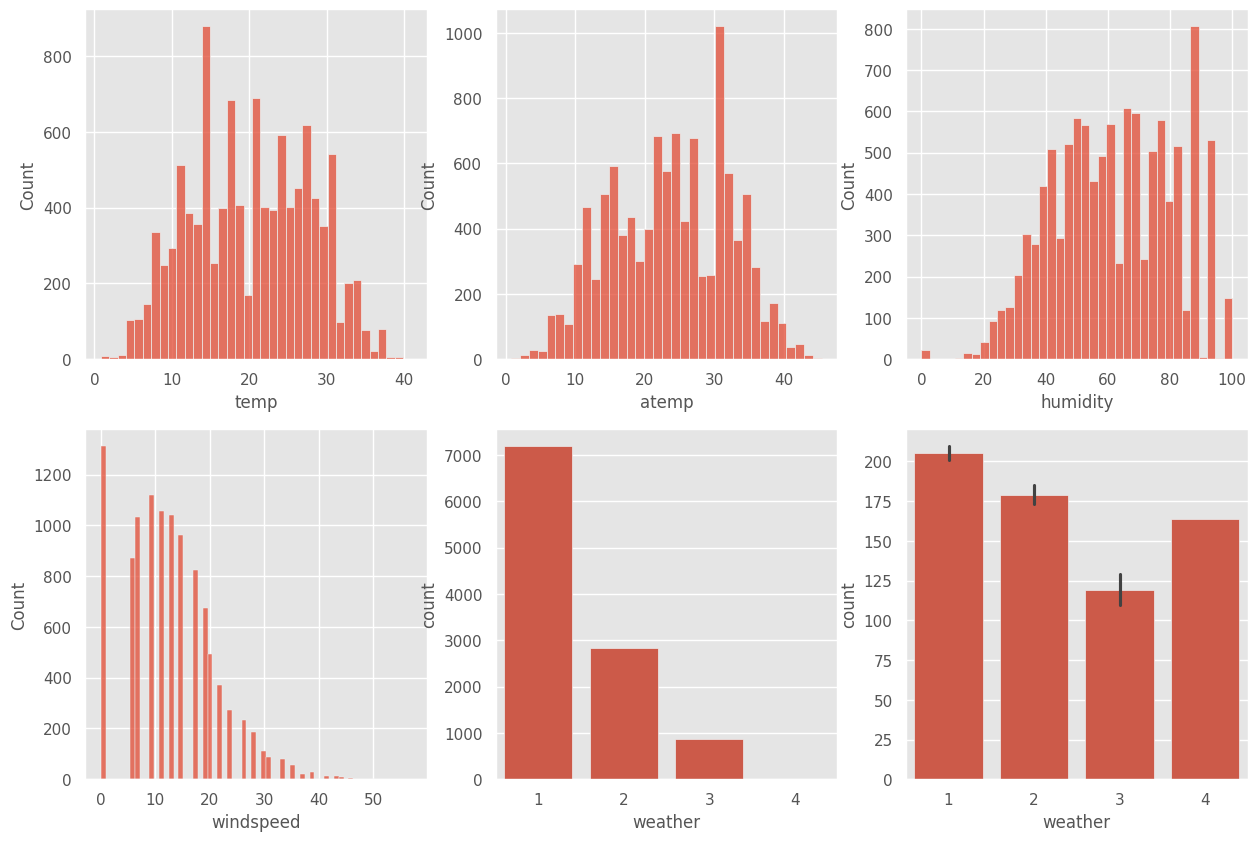

In [ ]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
fig.set_size_inches(15,10)

sns.histplot(data=train, x='temp', ax=ax1)
sns.histplot(data=train, x='atemp', ax=ax2)
sns.histplot(data=train, x='humidity', ax=ax3)
sns.histplot(data=train, x='windspeed', ax=ax4)
sns.countplot(data=train, x='weather', ax=ax5)
sns.barplot(data=train, y='count', x='weather', ax=ax6)

In [ ]:
train['weather'].value_counts()

,count
weather,
1,7192
2,2834
3,859
4,1


In [ ]:
train.groupby(['weather']).agg({'count':['count', 'max', 'min', 'mean', 'median']})

count                             
        count  max  min        mean median
weather                                   
1        7192  977    1  205.236791  161.0
2        2834  890    1  178.955540  134.0
3         859  891    1  118.846333   71.0
4           1  164  164  164.000000  164.0

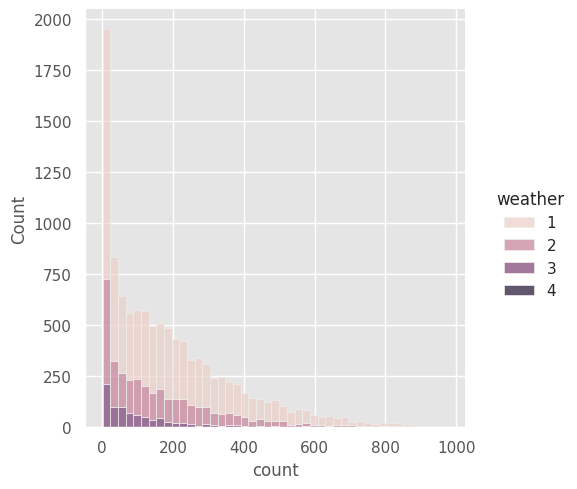

In [ ]:
sns.displot(train, x="count", hue="weather", multiple="stack")

## 기타
- workingday = weekend + holiday

<Axes: xlabel='dayofweek', ylabel='count'>

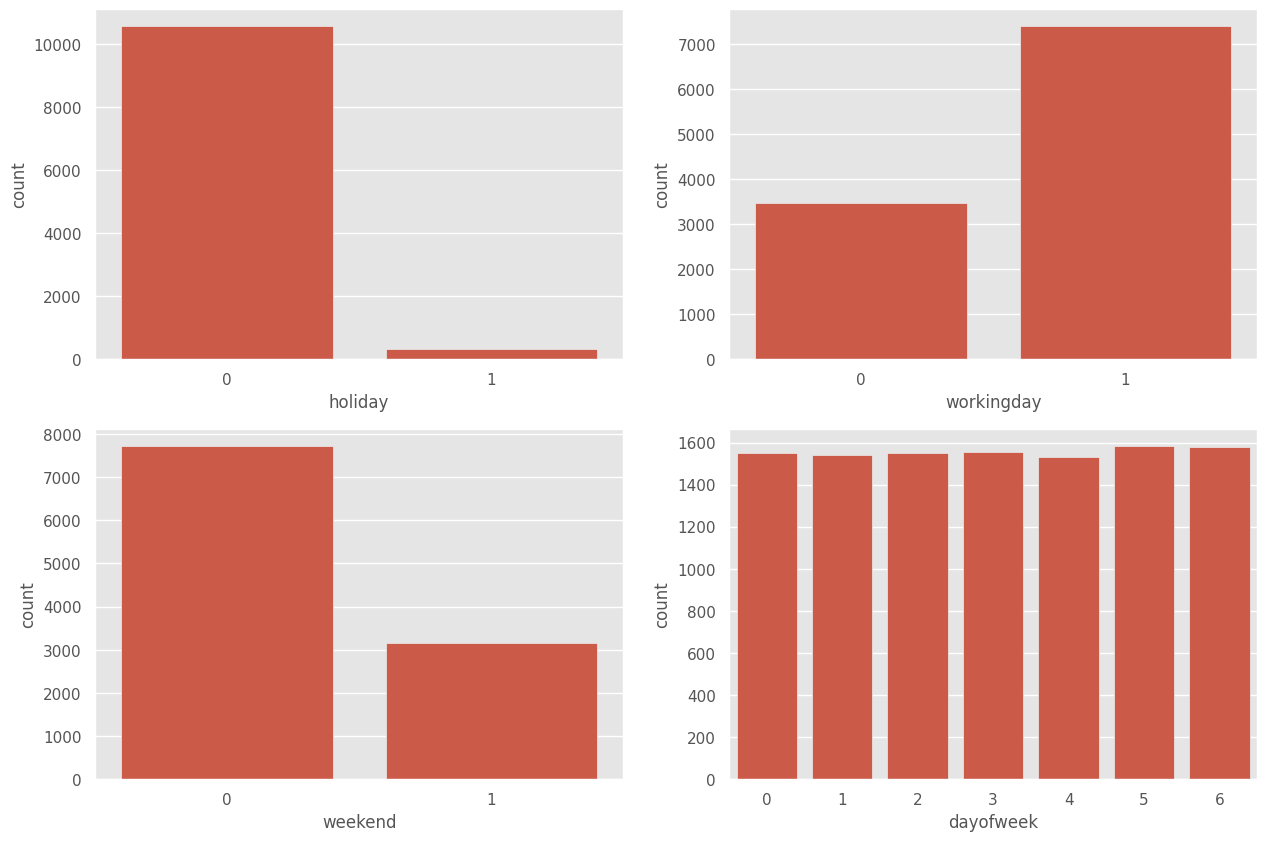

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,10)

sns.countplot(data=train, x='holiday', orient='v', ax=ax1)
sns.countplot(data=train, x='workingday', orient='v', ax=ax2)
sns.countplot(data=train, x='weekend', orient='v', ax=ax3)
sns.countplot(data=train, x='dayofweek', orient='v', ax=ax4)

In [ ]:
train['holiday'].value_counts()

,count
holiday,
0,10575
1,311


In [ ]:
train['weekend'].value_counts()

,count
weekend,
0,7723
1,3163


In [ ]:
train['workingday'].value_counts()

,count
workingday,
1,7412
0,3474


In [ ]:
3474 == 3163 + 311 # workingday = weekend + holiday

True

<Axes: xlabel='dayofweek', ylabel='count'>

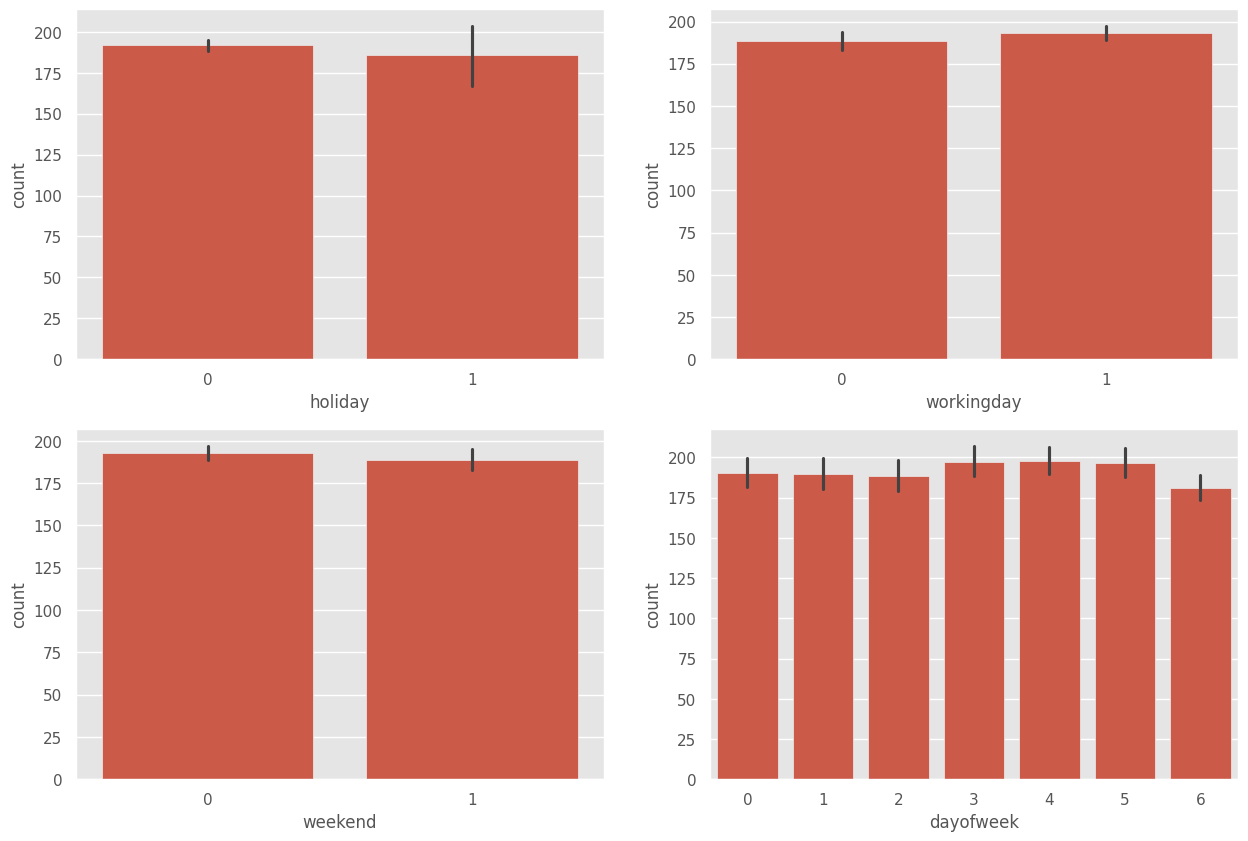

In [ ]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(15,10)

sns.barplot(data=train, y='count', x='holiday', orient='v', ax=ax1)
sns.barplot(data=train, y='count', x='workingday', orient='v', ax=ax2)
sns.barplot(data=train, y='count', x='weekend', orient='v', ax=ax3)
sns.barplot(data=train, y='count', x='dayofweek', orient='v', ax=ax4)

<Axes: xlabel='hour', ylabel='count'>

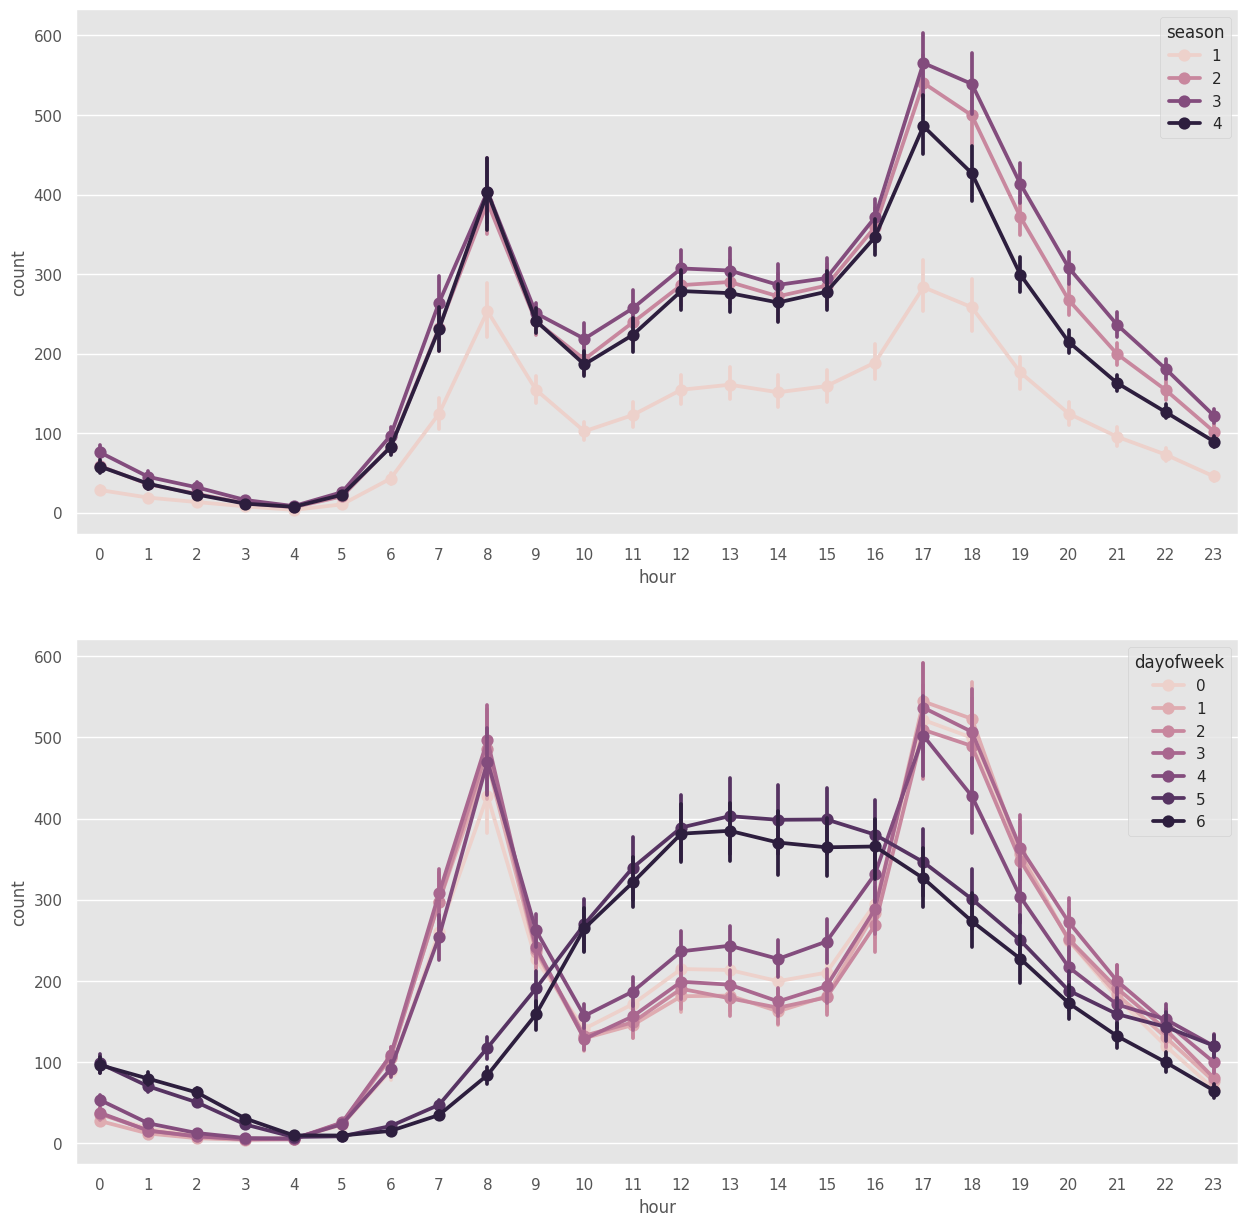

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(15,15)

sns.pointplot(x='hour',y='count',hue='season',join=True, data=train, ax=ax1)
sns.pointplot(x='hour',y='count',hue='dayofweek',join=True, data=train, ax=ax2)

Text(28.000000000000014, 0.5, 'Count')

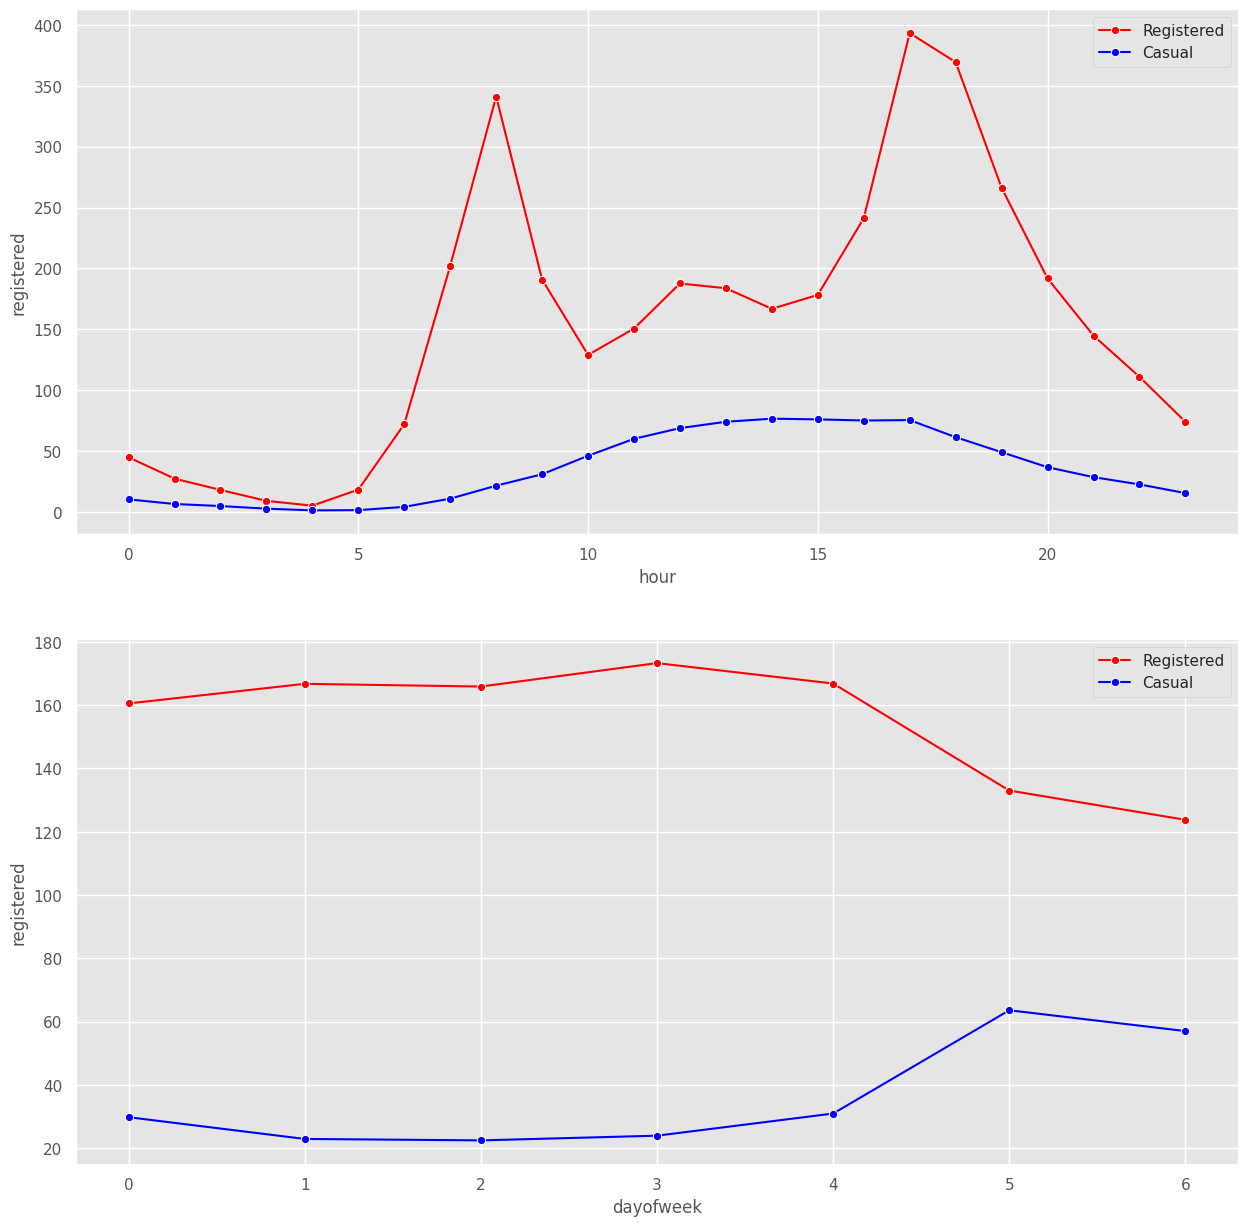

In [ ]:
fig,(ax1,ax2)= plt.subplots(nrows=2)
fig.set_size_inches(15,15)

sns.lineplot(x='hour', y='registered', data=train, color='red',label='Registered', marker='o', ax=ax1, ci=None)
sns.lineplot(x='hour', y='casual', data=train, color='blue', label='Casual', marker='o', ax=ax1, ci=None)
ax3.set_ylabel('Count')
sns.lineplot(x='dayofweek', y='registered', data=train, color='red',label='Registered', marker='o', ax=ax2, ci=None)
sns.lineplot(x='dayofweek', y='casual', data=train, color='blue', label='Casual', marker='o', ax=ax2, ci=None)
ax3.set_ylabel('Count')

## 해석
- holiday, workingday, weekend
  - 서로 많이 비슷한 것 같음
  - workingday만 쓰자
- workingday값에 따라 사용 시간대가 달라짐
- 2011년도보다 2012년도가 사용량이 증가함
  - 하지만 사용 패턴은 비슷
- weather의 4는 데이터가 1개만 존재함.
  - 처리 필요
  - weather4인 경우에는 workiongday가 1인 경우이다.
- season, quarter
  - 동일한 데이터 같음
  - 삭제(month 2개월 단위 새로 만듬)
- month를 2개월 단위로 묶는 것이 좋을 것 같음
  - 겨울이 다른 계절보다 count가 적음
- hour
  - 출퇴근 시간에 많이 발생함(따로 변수 생성 필요)
- minute, second는 삭제 필요

# 상관관계

In [ ]:
df_corr = abs(train.drop(['minute', 'second'], axis=1).corr())
df_corr

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,dayofweek,quarter,hour,weekend,count_log,new_count
season,1.000000,0.029368,0.008126,0.008879,0.258689,0.264744,0.190610,0.147121,0.096758,0.164011,0.163439,0.004797,0.971524,0.001729,0.010553,1.000000,0.006546,0.002433,0.160452,0.163439
holiday,0.029368,1.000000,0.250491,0.007074,0.000295,0.005215,0.001929,0.008409,0.043799,0.020956,0.005393,0.012021,0.001731,0.015877,0.191832,0.029368,0.000354,0.109748,0.001231,0.005393
workingday,0.008126,0.250491,1.000000,0.033772,0.029966,0.024660,0.010880,0.013373,0.319111,0.119460,0.011594,0.002482,0.003394,0.009829,0.704267,0.008126,0.002780,0.934780,0.015326,0.011594
weather,0.008879,0.007074,0.033772,1.000000,0.055035,0.055376,0.406244,0.007261,0.135918,0.109340,0.128655,0.012548,0.012144,0.007890,0.047692,0.008879,0.022740,0.032078,0.108005,0.128655
temp,0.258689,0.000295,0.029966,0.055035,1.000000,0.984948,0.064949,0.017852,0.467097,0.318571,0.394454,0.061226,0.257589,0.015551,0.038466,0.258689,0.145430,0.030873,0.376587,0.394454
atemp,0.264744,0.005215,0.024660,0.055376,0.984948,1.000000,0.043536,0.057473,0.462067,0.314635,0.389784,0.058540,0.264173,0.011866,0.040235,0.264744,0.140343,0.023405,0.372167,0.389784
humidity,0.190610,0.001929,0.010880,0.406244,0.064949,0.043536,1.000000,0.318607,0.348187,0.265458,0.317371,0.078606,0.204537,0.011335,0.026507,0.190610,0.278011,0.010463,0.333158,0.317371
windspeed,0.147121,0.008409,0.013373,0.007261,0.017852,0.057473,0.318607,1.000000,0.092276,0.091052,0.101369,0.015221,0.150192,0.036157,0.024804,0.147121,0.146631,0.016816,0.122754,0.101369
casual,0.096758,0.043799,0.319111,0.135918,0.467097,0.462067,0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,0.092722,0.014109,0.246959,0.096758,0.302045,0.311558,0.579034,0.690414
registered,0.164011,0.020956,0.119460,0.109340,0.318571,0.314635,0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,0.169451,0.019111,0.084427,0.164011,0.380540,0.114959,0.792129,0.970948


<Axes: >

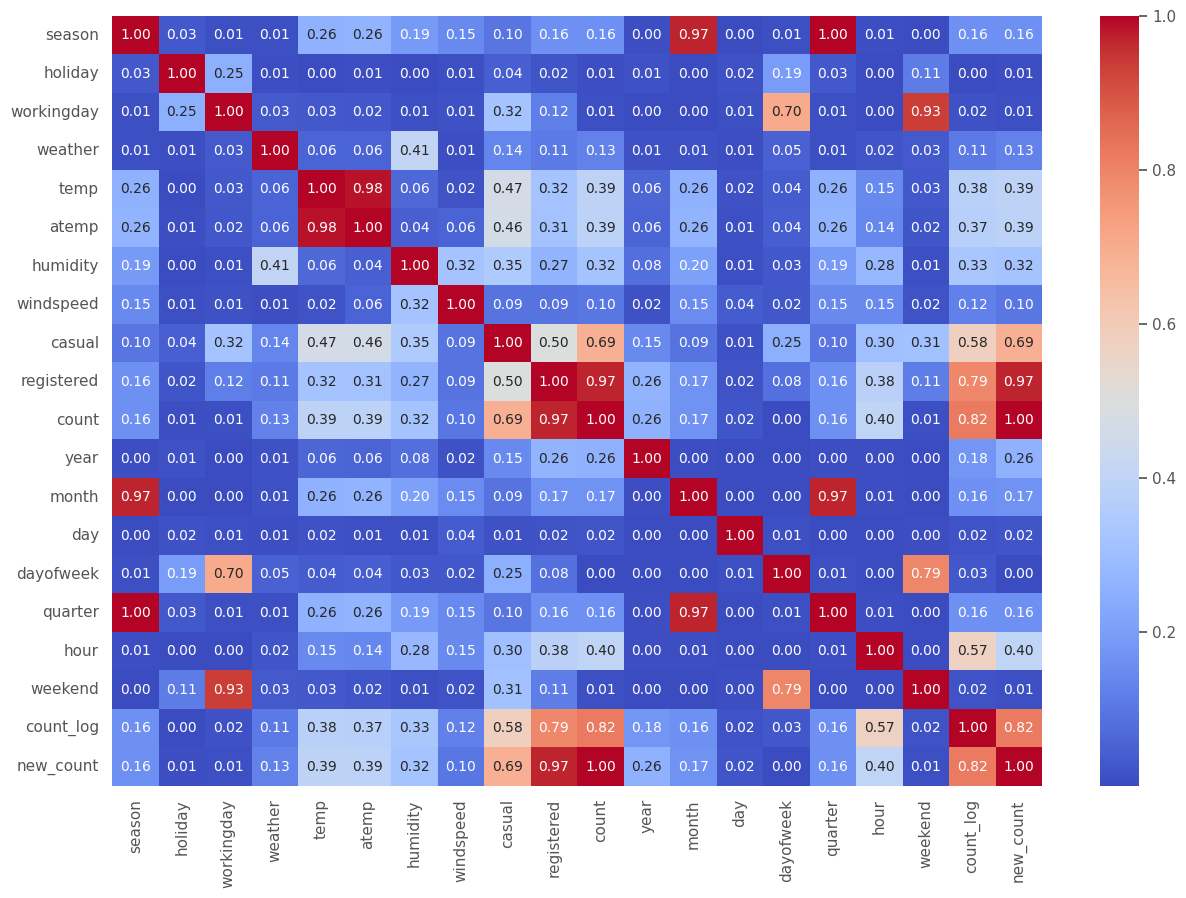

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')

## 다중공선성

다중공선성 문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다. 적절한 회귀분석을 위해 해결해야 하는 문제가 된다.  

해결방법
  - 상관관계가 높은 독립변수 중 하나 혹은 일부를 제거
  - 변수를 변환

## 해석
- 당중공선성 문제가 발생할 수 있는 변수들이 다수 발견됨

# EDA 분석 결과

- 결측치
  - 없음
  - windspeed에서 0 데이터가 많이 있다.
    - 처리 필요!!
- target
  - count
    - 왜도가 심함(log처리 필요)
  - casual
    - 출퇴근 시간보다는 낮시간에 사용량이 증가한다.
    - 평일보다는 주말에 사용량이 더 많다.
    - 왜도가 심함(log처리 필요)
  - registered
    - 출퇴근 시간에 사용량이 많다.
    - 주말보다는 평일에 사용량이 더 많다.
    - 왜도가 심함(log처리 필요)
  - 데이터 비율
    - registered:casual = 81:19
- feature
  - 2012년도가 2011년도보다 사용량이 많다.
    - 하지만 사용 패턴은 비슷하다.
  - minute, second
    - 필요없음
  - 봄(season 1)이 다른 계절보다 사용량이 적다.
  - workingday = holiday + weekend
    - holiday, weekend 필요없음
    - holiday에서 1 데이터가 매우 적다.
      - unbalance data!!
  - season, quarter
    - 동일한 데이터(quarter 삭제)
    - 또는 month 2개월 단위의 새로운 변수 생성
  - weather에서 4 데이터가 1개만 존재한다.
    - unbalance data!!
    - 날씨가 좋으면 사용량이 증가
  - 상관관계(다중공선성)
    - temp & atemp의 상관관계가 매우 높다.